In [221]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\michael zheng\anaconda3\python.exe -m pip install --upgrade pip' command.


In [222]:
import pandas as pd
import requests
import json
import plotly.express as px
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud


def get_api_response_dict(api_string):
    '''
    This function returns an api endpoint given an api url.
    param api_string: string that gets desired endpoint
    return: response data
    rtype: dictionary 
    '''
    response=requests.get(api_string)
    response_dict= json.loads(response.text)
    return response_dict

def normalize(int_list):
    '''
    This function normalizes a list of numbers.
    param data frame: list of numbers 
    return: list of normalized numbers
    rtype: list of ints
    '''
    scalers=int_list
    norm_const= min(int_list)
    for i in range(len(scalers)):
        value= math.floor(int(scalers[i])/int(norm_const))
        if value<20: #not an outlier 
            scalers[i]= value
        else: #Outlier, set roof to 15 
            scalers[i]=15
        
    return scalers


In [218]:
get_var='NAME,FACTORS_P,FACTORS_P_LABEL,FIRMPDEMP'
for_var='us:*'
api_key='df5650e574bdf05fd953cbdd1a6fc17a27780a2f'
api_string= (f'https://api.census.gov/data/2018/abstcb?get={get_var}&for={for_var}&key={api_key}')
raw_data= list(get_api_response_dict(api_string))
df=pd.DataFrame(raw_data[1:],columns=raw_data[0])
#Split Factors_P_Label 
df['Tech_Production_Qualm']= list(map(lambda x: x.split(':')[1],df['FACTORS_P_LABEL']))
df['Tech_Production']= list(map(lambda x: x.split(':')[0],df['FACTORS_P_LABEL']))

#separate each tech production into its own seprate table, and remove the row where 'Tech_Production Qualm'='Total Reporting'
AI_df=df.query('Tech_Production==\'Artificial Intelligence\'')
AI_df=AI_df[AI_df['FACTORS_P_LABEL']!='Artificial Intelligence: Total Reporting']

CB_df=df.query('Tech_Production==\'Cloud-Based\'')
CB_df=CB_df[CB_df['FACTORS_P_LABEL']!='Cloud-Based: Total Reporting']

SF_df=df.query('Tech_Production==\'Specialized Software\'')
SF_df=SF_df[SF_df['FACTORS_P_LABEL']!='Specialized Software: Total Reporting']

RO_df=df.query('Tech_Production==\'Robotics\'')
RO_df=RO_df[RO_df['FACTORS_P_LABEL']!='Robotics: Total Reporting']

SE_df=df.query('Tech_Production==\'Specialized Equipment\'')
SE_df=SE_df[SE_df['FACTORS_P_LABEL']!='Specialized Equipment: Total Reporting']

#Normalize firm samples for each row's tech problem
AI_scalars= normalize(list(AI_df['FIRMPDEMP']))
CB_scalars= normalize(list(CB_df['FIRMPDEMP']))
SF_scalars= normalize(list(SF_df['FIRMPDEMP']))
RO_scalars= normalize(list(RO_df['FIRMPDEMP']))
SE_scalars= normalize(list(SE_df['FIRMPDEMP']))


In [219]:
#visualize data 
plt.figure()
fig = px.treemap(AI_df, path=['Tech_Production','Tech_Production_Qualm'],values=AI_scalars)
fig.show()

plt.figure()
fig = px.treemap(CB_df, path=['Tech_Production','Tech_Production_Qualm'],values=CB_scalars)
fig.show()

plt.figure()
fig = px.treemap(SF_df, path=['Tech_Production','Tech_Production_Qualm'],values=SF_scalars)
fig.show()

plt.figure()
fig = px.treemap(RO_df, path=['Tech_Production','Tech_Production_Qualm'],values=RO_scalars)
fig.show()

plt.figure()
fig = px.treemap(SE_df, path=['Tech_Production','Tech_Production_Qualm'],values=SE_scalars)
fig.show()




[19, 3, 1, 1, 2, 1, 2, 3, 15, 15]
[3, 15, 15, 18, 2, 1, 1, 2, 1, 6]
[15, 2, 1, 1, 3, 2, 3, 4, 15, 15]
[18, 2, 1, 0, 1, 1, 1, 2, 15, 15]
[17, 1, 1, 0, 1, 1, 1, 3, 15, 15]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

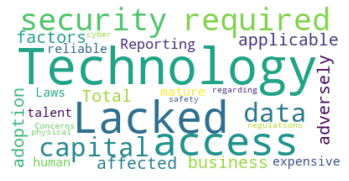

In [237]:
words= list(df['Tech_Production_Qualm'].unique())
text = " ".join(problem for problem in words)
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()